<a href="https://colab.research.google.com/github/Flowtacon/MIT-Elective-project-Deep-learning/blob/main/High_Code_SVHN_Digit_Recognition_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
# Mounting google drive with the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
path = "/content/drive/MyDrive/soukromé/MIT/MIT-Elective_Project-Deep_learning"
os.chdir(path)

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
# Importing the common libraries
import pandas as pd
import numpy as np

# Importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit learn components
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow
# Importing Tensor flow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [ ]:
# Checking the version of the tensorflow library in our relation
print(f"Tf version is: {tensorflow.__version__}")

Tf version is: 2.19.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5df = h5py.File('/content/drive/MyDrive/soukromé/MIT/MIT-Elective_Project-Deep_learning/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5df['X_train'][:]

y_train = h5df['y_train'][:]

X_test = h5df['X_test'][:]

y_test = h5df['y_test'][:]


# Close this file

h5df.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**

After running the code we can see that there are 18,000 images in the testing dataset and 42,000 images in the training dataset.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

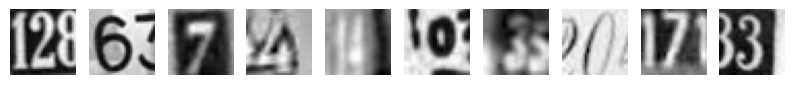

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# We need to visualize the first ten images of the dataset and print their labels...
# To do that we need to prepare a field to "plot" the given images...

plt.figure(figsize=(10,1))

# We initiate a for loop to loop through ten times
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.axis("off")
plt.show()

# We need to set up the labeling of the data as well which can be done with
print("label for each of the above image: %s" % (y_train[0:10]))


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Firstly we need to print the shape and the array of px for the first picture
print(f"The shape of the first image is: {X_train[0].shape}")
print()
print(f"The array of pixels for the first image is:\n {X_train[0]}")

The shape of the first image is: (32, 32)

The array of pixels for the first image is:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# We need to reshape the dataset from 2D pictures to 1D array for he training purposses.
X_train = X_train.reshape(X_train.shape[0], 1024)

In [ ]:
# We need to do the same with the testing data as well.
X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [ ]:
# Now is the need for data normalisation inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

Print the shapes of Training and Test data

In [ ]:
# printing the new shape of the training and testing datasets.
print(f"The new shape of the training dataset is: {X_train.shape}, {y_train.shape}")
print(f"The new shape of the testing dataset is: {X_test.shape}, {y_test.shape}")

The new shape of the training dataset is: (42000, 1024), (42000,)
The new shape of the testing dataset is: (18000, 1024), (18000,)


### **One-hot encode output**

In [ ]:
# Before model training we need to OHE the data we use One-Hot Encoding to convert categorical data into a numerical format that machine learning algorithms can process
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Testing labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

**Observation:**

Every entry of the dependent variable is now One hot encoded vector instead of label


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
np.random.seed(42)

import random

random.seed(42)

tensorflow.random.set_seed(42) # Creating the seed for random generators...

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# Creating the function that defines the model of 2 hidden and 1 output layer...
def nn_model_1():
  model = Sequential()
  # Now we need to create the layers as the model architecture says...
  model.add(Dense(64, activation="relu", input_shape=(1024,))) # -> 1st hidden layer...
  model.add(Dense(32, activation="relu")) # -> 2nd hidden layer...
  model.add(Dense(10, activation="softmax")) # -> Output layer...
  model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

  return model # returning the model after compiling

In [ ]:
# Building the model now
model_1 = nn_model_1()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Printing model_1s summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the model with data
history_model_1 = model_1.fit(X_train,y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=20)


Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1088 - loss: 2.3082 - val_accuracy: 0.1744 - val_loss: 2.2324
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2135 - loss: 2.1556 - val_accuracy: 0.3065 - val_loss: 1.9384
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3158 - loss: 1.9163 - val_accuracy: 0.3844 - val_loss: 1.7683
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4275 - loss: 1.6879 - val_accuracy: 0.5104 - val_loss: 1.4989
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5228 - loss: 1.4552 - val_accuracy: 0.5558 - val_loss: 1.3696
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5636 - loss: 1.3518 - val_accuracy: 0.5798 - val_loss: 1.3064
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5877 - loss: 1.2884 - val_accuracy: 0.6018 - val_loss: 1.2553
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6060 - loss: 1.2421 - val_accuracy: 0.

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [ ]:
# Visualisation of the field tactics

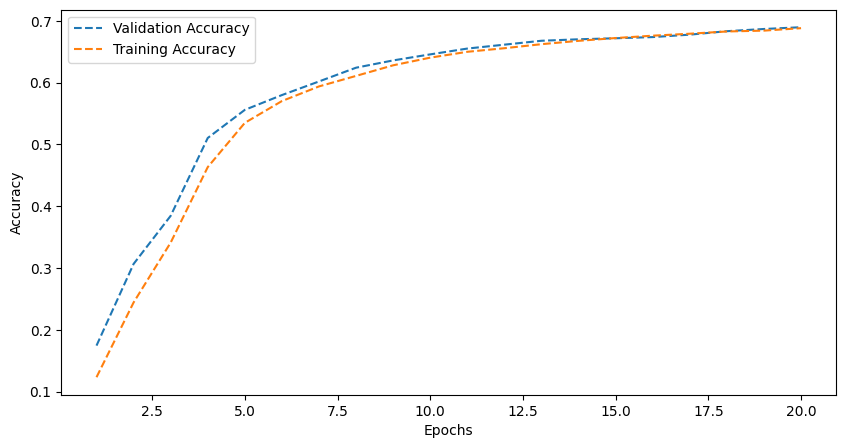

In [ ]:
# Plotting the validation accuracies
dict_history = history_model_1.history
list_epochs = [i for i in range(1,21)]
plt.figure (figsize=(10,5))
plt.plot(list_epochs, dict_history["val_accuracy"], ls= "--", label="Validation Accuracy")
plt.plot(list_epochs, dict_history["accuracy"], ls= "--", label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Observations:**

The model has a positive learning trend while both the training and validation accuracy is consistently rising. This indicates that the model is effectively leearning from the data. and is improving its prediction from the time it started learning.

There is a steep increase in the first epochs which suggest that the model has learned the easy patterns in the dataset.

The model is around epoch 10 slowing down the improvements significantly. That might be a reson to think that the model is reaching capacity or converging with a fin al acc score of around 68%...

On the plot we can see that the model generelize well there are no signs of overfitting because the Validation and training curve are closely to each other.

There could be a underfitting problem because the model is finishing at 68% of accuracy. meaning a more complex model might push the accuracy higher.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# before continuing we need to clear first model´s history from backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Refixing the seed number for num generators
np.random.seed(42)

import random

random.seed(42)

tensorflow.random.set_seed(42)


### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
# defining the 2nd model
def nn_model_2():
  model = Sequential()
  # Adding layers for the architecture of 2nd model
  model.add(Dense(256, activation="relu", input_shape=(1024,))) # First hidden layer
  model.add(Dense(128, activation="relu")) # Second hidden layer
  model.add(Dropout(0.2)) # Dropout layer
  model.add(Dense(64, activation="relu")) # Third hidden layer
  model.add(Dense(64, activation="relu")) # Fourth hidden layer
  model.add(Dense(32, activation="relu")) # Fifth hidden layer
  model.add(BatchNormalization()) # Batchnorm layer
  model.add(Dense(10, activation="softmax")) # Output layer

  # Compilation of the model
  model.compile(
      loss="categorical_crossentropy",
      optimizer=Adam(learning_rate=0.0005),
      metrics=["accuracy"]
  )
  return model # Returning the 2nd model architecture

In [ ]:
# fitting the 2nd model
model_2 = nn_model_2()

In [ ]:
# 2nd model summary
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
# Fitting the 2nd model
history_model_2 = model_2.fit(X_train,y_train,validation_split=0.2, batch_size=128, verbose=1, epochs=30 )

Epoch 1/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1000 - loss: 2.3780 - val_accuracy: 0.1032 - val_loss: 2.3040
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1130 - loss: 2.2940 - val_accuracy: 0.2020 - val_loss: 2.1464
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2984 - loss: 1.9464 - val_accuracy: 0.4121 - val_loss: 1.6793
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4733 - loss: 1.5220 - val_accuracy: 0.5394 - val_loss: 1.3722
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5420 - loss: 1.3634 - val_accuracy: 0.5667 - val_loss: 1.2996
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5832 - loss: 1.2602 - val_accuracy: 0.6135 - val_loss: 1.1853
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6189 - loss: 1.1708 - val_accuracy: 0.6331 - val_loss: 1.1446
Epoch 8/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6465 - loss: 1.1113 -

### **Plot the Training and Validation Accuracies and write down your Observations.**

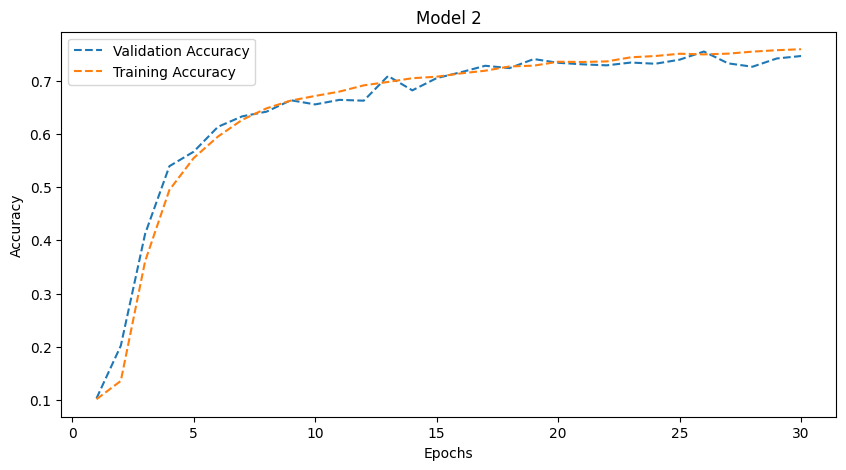

In [ ]:
# Plotting the validation accuracies for the second NN model
dict_history_2 = history_model_2.history
list_epochs = [i for i in range(1,31)]
plt.figure (figsize=(10,5))
plt.plot(list_epochs, dict_history_2["val_accuracy"], ls= "--", label="Validation Accuracy")
plt.plot(list_epochs, dict_history_2["accuracy"], ls= "--", label="Training Accuracy")
plt.title("Model 2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Observations:**

The second model has slightly better accuracy with peak at 0.76. Similar to the first model there is steep accuracy increase during the first 6 epochs. The lines of the validation and training are still very close to each other for the majority of the training process. This indicates well generalization and no major overfitting. Unline the first model here on the end and middle we can observe slight volatility. While the model is not severely overfitted, with more epochs than 30 there is a chance the model start to overfitt.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each and every to a single label from OHE vector
y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1814
           1       0.75      0.77      0.76      1828
           2       0.79      0.76      0.78      1803
           3       0.67      0.72      0.70      1719
           4       0.80      0.82      0.81      1812
           5       0.77      0.66      0.71      1768
           6       0.78      0.71      0.74      1832
           7       0.77      0.77      0.77      1808
           8       0.61      0.74      0.67      1812
           9       0.77      0.70      0.74      1804

    accuracy                           0.75     18000
   macro avg       0.75      0.75      0.75     18000
weighted avg       0.75      0.75      0.75     18000



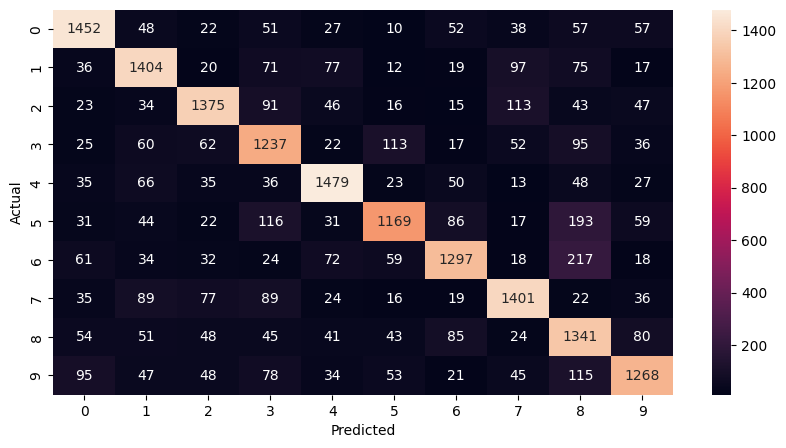

In [ ]:
# importing the functions for the report
from sklearn.metrics import classification_report, confusion_matrix

# Printing the report now
print(classification_report(y_test, test_pred))

# Ploting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred) # using p usredicted and actual labels
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Final Observations:**

The model achieved an overall accuracy of 75%. Which indicates that the simple neural network NN is correctly predicting 3/4 of the test data. While this is a reasonable baseline. There is much room for improvement. Using CNNs (Convolutional neural network) can probably improve the understanding greatly. As we know CNNs are better for learning upon image data.

class number 4 is the models strongest category where it achieved 0.81  F1-score, with balanced precission and recall.

Class number 8 is the lowest ones with precision of 0.61 resp. In simple language that means that when model predicts this class it is more likey that it predict it as False Positive.

There are frequent mistakes in class 5 and 6 vs class 8. (193 and 217 times).

**Final Conclusion:**
Model works generaly well with 75% accuracy it suffers from specific "cluster" confussions. It indicates that Class 8 have visual similarities with Classes 5 and 6 that our architecture struggles to distinguish.


## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Yet again we muust prepare and split the data for the CNNs

h5df = h5py.File('/content/drive/MyDrive/soukromé/MIT/MIT-Elective_Project-Deep_learning/SVHN_single_grey1.h5', 'r')

X_train = h5df["X_train"][:]
y_train = h5df["y_train"][:]
X_test = h5df["X_test"][:]
y_test = h5df["y_test"][:]
h5df.close() # Closing the file

Check the number of images in the training and the testing dataset.

In [ ]:
# Checking the count of the images
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
We are working with the same dataset so the counts are same. 42 thousand datapoints for training and 18 thousand for testing.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the firtst image

print(f"The shape of the first image is: {X_train[0].shape}")
print()
print(f"The array of pixels for the first image is:\n {X_train[0]}")

The shape of the first image is: (32, 32)

The array of pixels for the first image is:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# now we need to reshape the dataset for the CNNs. which need 4D errays.
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalizing the inputs now
X_train = X_train/255.0
X_test = X_test/255.0

Print New shape of Training and Test

In [ ]:
# new shape of the datasets
print(f"The new shape of the training dataset is: {X_train.shape}, {y_train.shape}")
print(f"The new shape of the testing dataset is: {X_test.shape}, {y_test.shape}")

The new shape of the training dataset is: (42000, 32, 32, 1), (42000,)
The new shape of the testing dataset is: (18000, 32, 32, 1), (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Writing now the function to one hot encode the output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

**Observation:**
yet again we use One-Hot Encoding to convert categorical labels into a numerical format (binary vectors) that the machine learning model can process, ensuring it does not incorrectly assume a mathematical order or hierarchy (like 2>1) between distinct categories.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fixing seed for training
np.random.seed(42)
import random
random.seed(42)
tensorflow.random.set_seed(42)


### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
from tensorflow.keras.layers import Conv2D, LeakyReLU, BatchNormalization, Dropout, MaxPooling2D, Flatten

In [ ]:
def cnn_model_1():
  model = Sequential()

  # Add layers as set in the description
  model.add(Conv2D(16, kernel_size=(3,3), padding="same", input_shape=(32,32,1))) # First convolutional layer
  model.add(LeakyReLU(alpha=0.1)) # LeakyRelu
  model.add(Conv2D(32, kernel_size=(3,3), padding="same")) # Second convolutional layer
  model.add(LeakyReLU(alpha=0.1)) # LeakyRelu
  model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling layer
  model.add(Flatten()) # Flatten layer
  model.add(Dense(32)) # Dense layer
  model.add(LeakyReLU(alpha=0.1)) # LeakyRelu
  model.add(Dense(10, activation="softmax")) # Output layer

  # Compiling the model now
  model.compile(
      loss = "categorical_crossentropy",
      optimizer=Adam(learning_rate=0.001),
      metrics=["accuracy"]
  )
  return model

  # Now after compiling the model we are ready to build and fit the model

In [ ]:
# Bulding the model
cnn_model_1 = cnn_model_1()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Printing the summary of the model to check if everything is correct and ready for fitting
cnn_model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# now we are going to train the model
history_cnn_model_1 = cnn_model_1.fit(X_train, y_train, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 62s 58ms/step - accuracy: 0.4014 - loss: 1.6802 - val_accuracy: 0.8087 - val_loss: 0.6497
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 62s 59ms/step - accuracy: 0.8327 - loss: 0.5743 - val_accuracy: 0.8356 - val_loss: 0.5713
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 62s 59ms/step - accuracy: 0.8682 - loss: 0.4587 - val_accuracy: 0.8529 - val_loss: 0.5251
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 61s 59ms/step - accuracy: 0.8859 - loss: 0.3890 - val_accuracy: 0.8681 - val_loss: 0.4882
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 60s 57ms/step - accuracy: 0.9016 - loss: 0.3371 - val_accuracy: 0.8644 - val_loss: 0.4893
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 62s 59ms/step - accuracy: 0.9143 - loss: 0.2938 - val_accuracy: 0.8658 - val_loss: 0.5033
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 62s 59ms/step - accuracy: 0.9249 - loss: 0.2621 - val_accuracy: 0.8602 - val_loss: 0.5344
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 71s 67ms/step - accuracy: 0.9312 -

### **Plot the Training and Validation Accuracies and Write your observations.**

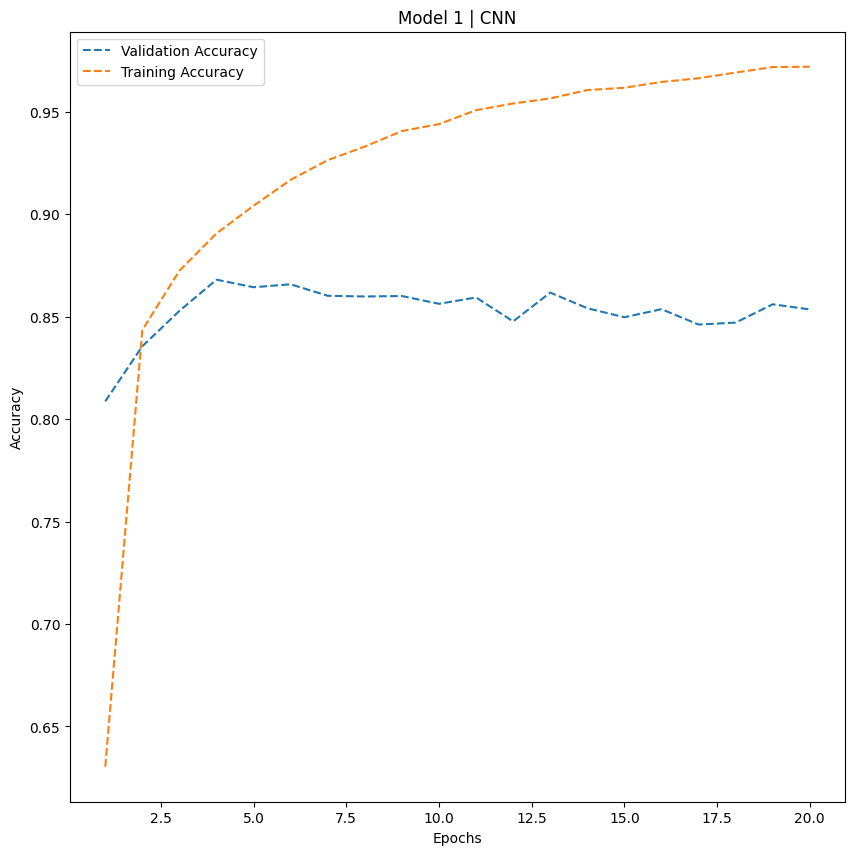

In [ ]:
# Plotting the validation accuracies for the first CNN model
dict_history_3 = history_cnn_model_1.history
list_epochs = [i for i in range(1,21)]
plt.figure (figsize=(10,10))
plt.plot(list_epochs, dict_history_3["val_accuracy"], ls= "--", label="Validation Accuracy")
plt.plot(list_epochs, dict_history_3["accuracy"], ls= "--", label="Training Accuracy")
plt.title("Model 1 | CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Observations:**

In the plot we can clearly say that the model is severly overfitted. The training accuracy is climbing to 97.2% while the validation set is roughly at 86.8 % at epoch 4. than it stagnates or even slightly decreases.

**Conclusion:**
The model is hallucinating. It has learned the noise in the training set rather than the rules. Which is why it performs so poorly on the validation set. Regularization would be needed to get the model better.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random generators
np.random.seed(42)
import random
random.seed(42)
tensorflow.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# now we are going to orchastrate the second cnn model with different architecture
def cnn_model_2():
  model = Sequential()

  # Setting up the layers
  model.add(Conv2D(16, kernel_size=(3,3), padding="same", input_shape=(32,32,1))) # First Conv. layer
  model.add(LeakyReLU(alpha=0.1)) # LeakyRelu

  model.add(Conv2D(32, kernel_size=(3,3), padding="same")) # Second Conv. layer
  model.add(LeakyReLU(alpha=0.1)) # LeakyRelu

  model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling layer
  model.add(BatchNormalization()) # Batchnorm layer

  model.add(Conv2D(32, kernel_size=(3,3), padding="same")) # Third Conv. layer
  model.add(LeakyReLU(alpha=0.1)) # LeakyRelu

  model.add(Conv2D(64, kernel_size=(3,3), padding="same")) # Fourth Conv. layer
  model.add(LeakyReLU(alpha=0.1)) # LeakyRelu

  model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling layer
  model.add(BatchNormalization()) # Batchnorm layer

  model.add(Flatten()) # Flatten layer

  model.add(Dense(32)) # Dense layer
  model.add(LeakyReLU(alpha=0.1)) # LeakyRelu

  model.add(Dropout(0.5)) # Dropout

  model.add(Dense(10, activation="softmax")) # Output layer

  #Compiling the model
  model.compile(
      loss="categorical_crossentropy",
      optimizer=Adam(learning_rate=0.001),
      metrics=["accuracy"]
  )
  # Returning the function
  return model


In [ ]:
#build the model
cnn_model_2 = cnn_model_2()


In [ ]:
# print the summary
cnn_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Fitting the 2nd CNN model
history_cnn_model_2 = cnn_model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 107s 397ms/step - accuracy: 0.3483 - loss: 1.8798 - val_accuracy: 0.3065 - val_loss: 2.2030
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 103s 393ms/step - accuracy: 0.7801 - loss: 0.7119 - val_accuracy: 0.8270 - val_loss: 0.6117
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 103s 393ms/step - accuracy: 0.8286 - loss: 0.5728 - val_accuracy: 0.8806 - val_loss: 0.4176
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 144s 402ms/step - accuracy: 0.8491 - loss: 0.5006 - val_accuracy: 0.8895 - val_loss: 0.3919
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 106s 402ms/step - accuracy: 0.8621 - loss: 0.4636 - val_accuracy: 0.8692 - val_loss: 0.4348
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 105s 400ms/step - accuracy: 0.8720 - loss: 0.4131 - val_accuracy: 0.8817 - val_loss: 0.4168
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 109s 413ms/step - accuracy: 0.8820 - loss: 0.3856 - val_accuracy: 0.9021 - val_loss: 0.3502
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 137s 395ms/step - accuracy: 0.8916 -

### **Plot the Training and Validation accuracies and write your observations.**

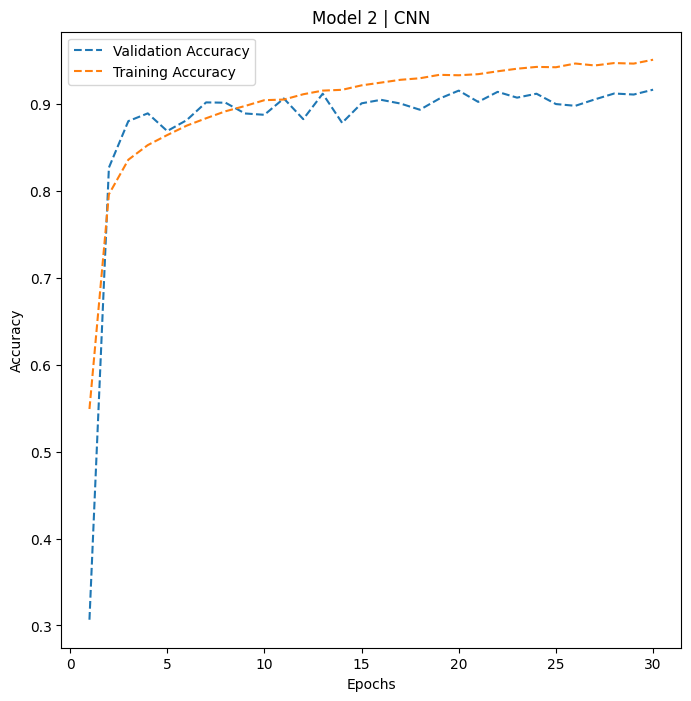

In [ ]:
# Plotting the validation accuracies for the first CNN model
dict_history_4 = history_cnn_model_2.history
list_epochs = [i for i in range(1,31)]
plt.figure (figsize=(8,8))
plt.plot(list_epochs, dict_history_4["val_accuracy"], ls= "--", label="Validation Accuracy")
plt.plot(list_epochs, dict_history_4["accuracy"], ls= "--", label="Training Accuracy")
plt.title("Model 2 | CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Observations:**

  The second CNN model demonstrates significantly improved performance compared to a basic architecture. By the 30th epoch, the model achieved a validation accuracy of approximately 91.7%, while the training accuracy reached roughly 95%. The addition of BatchNormalization and Dropout (0.5) layers successfully helped stabilize the training process and reduced overfitting, although a small gap between the training and validation curves is still visible. The use of LeakyReLU allowed for efficient gradient flow, helping the model converge quickly. Overall, the model generalizes well to unseen data and provides high classification accuracy.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Making the predicitions on the testing data using the second CNN model
test_pred = cnn_model_2.predict(X_test)
test_pred = np.argmax(test_pred, axis=-1)



563/563 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry single label from OHE vector....
test_pred_labels = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

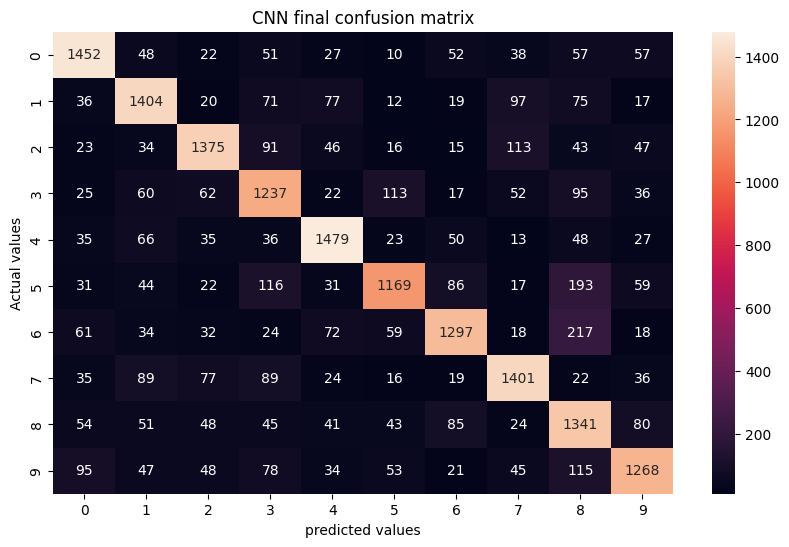

In [ ]:
# Importing the requiered functions
from sklearn.metrics import classification_report, confusion_matrix

# Printing the report and ploting heatmap (confusion matrix)
cm_cnn = confusion_matrix(test_pred_labels, test_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt=".0f")
plt.title("CNN final confusion matrix")
plt.xlabel("predicted values")
plt.ylabel("Actual values")
plt.show()

**Final Observations:**

Comparing the two models, it was interesting to see how much the architecture changes improved the results. My first model clearly suffered from **overfitting** while it memorized the training data perfectly ~98% accuracy, it struggled with the validation set ~85%.

To fix this, we used **BatchNormalization** and **Dropout 0.5** in the second model. These techniques worked really well to stabilize the training. The gap between training and validation accuracy is now much smaller, and the curves are smoother. I achieved a solid **validation accuracy of ~91.7%** by the 30th epoch.

Finally, the confusion matrix on the test data confirms that the model generalizes well to new images, with correct predictions forming a strong diagonal line.
